<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_MSAC/blob/main/gg_29_GD_regression_classification_rev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (선형회귀)

## Example of one feature (x1)

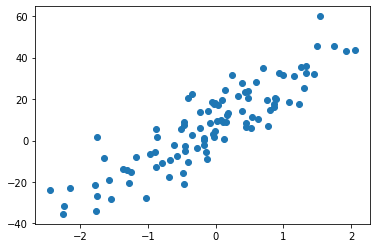

In [ ]:
# ex1: linear regression with two variables (y = wx + b)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
x = np.random.randn(n)                # batch size
y = x*20 + 10                         # w=20, b=10
y = y + np.random.randn(n) * 10       # add noise

plt.scatter(x,y)

In [ ]:
# --------
w=np.random.randn()   
b=np.random.randn()

lr = 0.01          # learning rate
n_epoch = 200
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w*x + b
    loss = ((y_pred - y)**2).mean()     # mean square error

    w = w - lr* 2 * ((y_pred - y)*x).mean()
    b = b - lr* 2 * (y_pred - y).mean()
    lossHistory.append(loss)
    if epoch %10 == 0:
        print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)
        
print('---------------------------')
print('epoch=', epoch, 'loss=', loss, 'w=', w, 'b=', b)


epoch= 0 loss= 607.4418175632635 w= -0.1726732448427638 b= 0.9321125412506677
epoch= 10 loss= 454.4368200279474 w= 3.1630338914811778 b= 2.861891911800585
epoch= 20 loss= 347.7893194399953 w= 5.964218037580376 b= 4.4446708682018405
epoch= 30 loss= 273.42362994576496 w= 8.316464651421606 b= 5.742962303603688
epoch= 40 loss= 221.54776422407014 w= 10.291668142914931 b= 6.807997993557026
epoch= 50 loss= 185.3465645195426 w= 11.950219715495825 b= 7.68176755119586
epoch= 60 loss= 160.0745681849369 w= 13.342846013963392 b= 8.39868834445284
epoch= 70 loss= 142.42600564870062 w= 14.512154233659938 b= 8.986973253081688
epoch= 80 loss= 130.09703965373402 w= 15.493930490186349 b= 9.469751009810212
epoch= 90 loss= 121.48143147378875 w= 16.318230799429482 b= 9.86598394007139
epoch= 100 loss= 115.45886289168811 w= 17.010297751856488 b= 10.191219787899708
epoch= 110 loss= 111.24763461180885 w= 17.591330695157676 b= 10.458207664048373
epoch= 120 loss= 108.30211549068872 w= 18.079132807419025 b= 10.6774

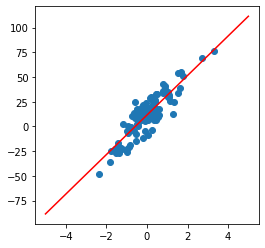

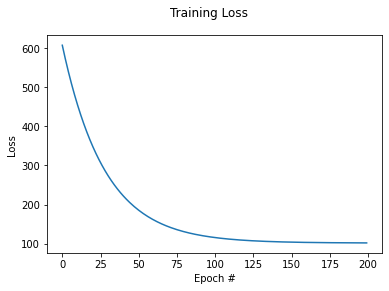

In [ ]:
plt.figure(figsize=(4,4))
plt.scatter(x,y)

xx = np.linspace(-5,5,100) 
yy = w * xx + b
plt.plot(xx,yy,c='r') 
plt.show()

fig = plt.figure()
plt.plot(np.arange(0, n_epoch), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Training two features (x1, x2)

In [ ]:
# ex 2 : training two parameters w1, w2 and b (y = w1*x1 + w2*x2 + b)

import numpy as np
import pandas as pd

n=100
x1 = np.random.randn(n)             # randn=normal distribution in (-1,1), rand=(0,1)
x2 = np.random.randn(n)

y = x1*30 + x2*40 + 50
y = y + np.random.randn(n)*20      # add noise

w1 = np.random.rand()               # initial guess
w2 = np.random.rand()
b = np.random.rand()

lr = 0.02                            # learning rate
n_epoch = 200                      # no of epoch
lossHistory = []

for epoch in range(n_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = ((y_pred - y)**2).mean()

    w1 = w1 - lr* ((y_pred - y)*x1).mean()
    w2 = w2 - lr* ((y_pred - y)*x2).mean()
    b = b - lr* (y_pred - y).mean()
    lossHistory.append(error)
        
print('---------------------------')
print('epoch=', epoch, 'error=', error, 'w1=', w1.round(2), 'w2=', w2.round(2), 'b=', b.round(2))

---------------------------
epoch= 199 error= 348.7906035833689 w1= 31.68 w2= 38.09 b= 46.52


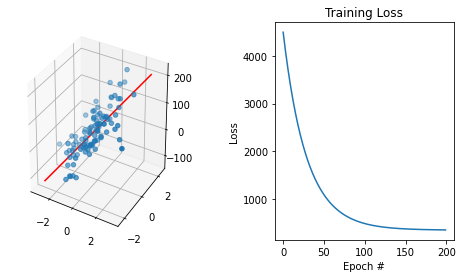

In [ ]:
plt.figure(figsize = (8,4))
ax1 = plt.subplot(121, projection='3d')
ax1.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax1.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

ax2 = plt.subplot(122)
ax2.plot(np.arange(0, n_epoch), lossHistory)
ax2.set_title("Training Loss")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Loss")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Using regression function (LinearRegression)

In [ ]:
# ex3: using regression function (LinearRegression)

from sklearn.linear_model import LinearRegression

X = np.concatenate([x1.reshape(n,1), x2.reshape(n,1)], axis=1)

model = LinearRegression()        # create model
model.fit(X,y)                    # train model

print("score: ",model.score(X,y))
print('w1=', model.coef_[0], 'w2=', model.coef_[1], 'b=', model.intercept_)

# prediction
new_X=[1,3]
print(model.predict([new_X])) 
#----
z = np.random.rand(10,2)
model.predict(z)

score:  0.8971295495567492
w1= 32.654795977852366 w2= 39.07902079499511 b= 48.54824698369164
[198.44010535]


array([ 83.72555357, 101.91646843,  91.12059339,  92.01357055,
       116.41731894,  86.93106485,  84.39082528, 104.97996041,
        92.75908725,  79.05315342])

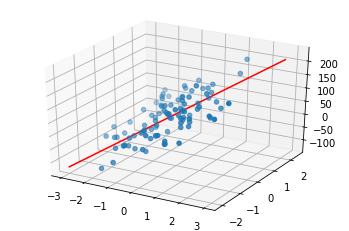

In [ ]:
w1, w2, b = model.coef_[0], model.coef_[1], model.intercept_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x1, x2, y);

xx = np.linspace(-3,3,100) 
yy = np.linspace(-2,2,100)
zz = w1*x1 + w2*x2 + b
ax.plot(xx, yy, w1*xx + w2*yy + b, c='r') 

## Use make_regression

In [ ]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X, y = make_regression(n_samples=2000, n_features=2, noise=1.5, random_state=1)
X = StandardScaler().fit_transform(X)
print(X[:5], y[:5])

[[ 0.33762316 -0.38981751]
 [-1.02672037  2.22938631]
 [ 0.09896413  0.63153974]
 [ 3.97755099 -1.64591196]
 [ 1.14153039 -0.70330793]] [-26.77111241 176.82634938  55.25266631 -79.36653137 -41.50945283]


In [ ]:
model = LinearRegression()        # create model
model.fit(X,y)                    # train model
model.score(X,y)

0.9996931455705321

# Classification (선형분류)

## Linear classification (use Cross Entropy as loss function)
- also called log loss (logistic regression)
- Logistic Regression
- Classification by Calculating parameters one by one

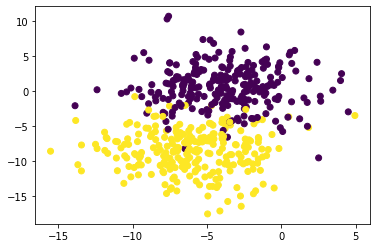

In [ ]:
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
plt.scatter(X[:,0], X[:,1], c=y)

In [ ]:
y[:10]

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0])

In [ ]:
w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn() 

def sigmoid_activation(z):
    return 1.0 / (1 + np.exp(-z))

lossHistory = []
epochs = 300
alpha = 0.01

for epoch in np.arange(epochs):
    preds = sigmoid_activation(w1*x1 + w2*x2 + b)       # prediction

    loss = -((y*np.log(preds) + (1-y)*np.log(1-preds))).mean()  # loss = cross entropy
    lossHistory.append(loss)
    
    dloss_dz = preds - y
    w1_deriv = dloss_dz * x1        # d(loss)/dw1 = d(loss)/dz * dz/dw1
    w2_deriv = dloss_dz * x2
    b_deriv = dloss_dz * 1
    
    w1 = w1 - (alpha * w1_deriv).mean()
    w2 = w2 - (alpha * w2_deriv).mean()
    b  = b  - (alpha * b_deriv).mean()

print(w1, w2, b)
accuracy = ((sigmoid_activation(w1*x1 + w2*x2 + b) > 0.5) == y).sum()/N
print(accuracy)

0.21573923094502 -0.5394099949804814 -0.22374489158980593
0.888


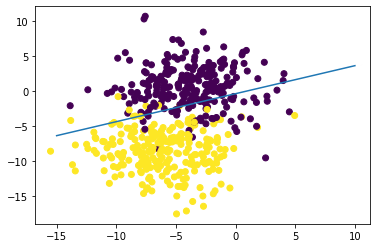

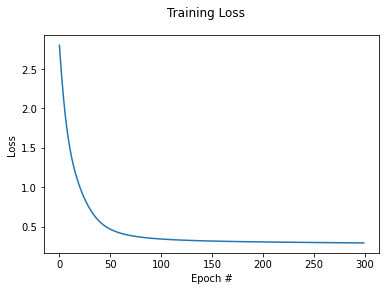

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y)
xx = np.linspace(-15,10,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy)
plt.show()

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, epochs), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

## Use library function: SGDClassifier()
- default: hinge loss (used in SVM)

In [ ]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.datasets import make_blobs

N = 500
(X, y) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=3.0, random_state=17)

SGDClassifier:  0.942
[[ -9.30123635 -28.85559005]] [-147.05631222]
Logistic Regression:  0.95
[[-0.21968752 -1.07145897]] [-5.38081202]


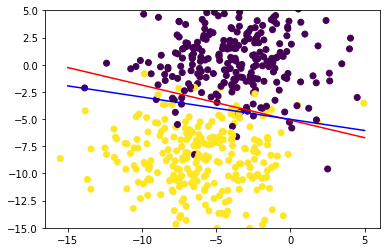

In [ ]:
clf = SGDClassifier()      
clf.fit(X[:,:2], y)    
print("SGDClassifier: ", clf.score(X[:, :2],y))
print(clf.coef_, clf.intercept_)

log = LogisticRegression()      
log.fit(X[:,:2], y)    
print("Logistic Regression: ", log.score(X[:, :2],y))
print(log.coef_, log.intercept_)
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

w1, w2, b = log.coef_[0,0], log.coef_[0,1], log.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='b')

## Hinge Loss
- Hinge loss is primarily used with Support Vector Machine (SVM) Classifiers with class labels -1 and 1. So make sure you change the label of the ‘Malignant’ class in the dataset from 0 to -1.
- Hinge Loss not only penalizes the wrong predictions but also the right predictions that are not confident.
- Himge loss for input-output pair (x,y) is given as:
- L = max(0, 1 - yf(x))
- L = 0 (if y*f(x) >= 1), 1-y*f(x) (otherwise)
- dL/dw1 = 0 (if y*f(x) >= 1), -y*x1 (otherwise)
      

In [ ]:
N = 500
(X, y_org) = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=2.0, random_state=17)
x1, x2 = X[:,0], X[:,1]
y = y_org.copy()
y[y==0] = -1
X[:5], y[:5], y_org[:5]

(array([[ -5.48619226,   1.21306671],
        [ -2.89056798,  -9.18025054],
        [ -1.5288614 ,   1.01129561],
        [ -7.48266658,  -9.99569036],
        [ -7.03983988, -10.35802726]]),
 array([-1,  1, -1,  1,  1]),
 array([0, 1, 0, 1, 1]))

0.31220791716011737 -0.6296150081995096 -0.52136547173199
0.952


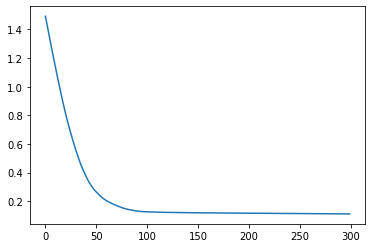

In [ ]:
w1, w2, b = np.random.randn(), np.random.randn(), np.random.randn()
lossHistory = []
epochs = 300
alpha = 0.01

N = len(x1)
for epoch in np.arange(epochs):

    w1_deriv, w2_deriv, b_deriv, loss = 0., 0., 0., 0.
    for i in range(N):
        score = y[i]*(w1*x1[i] + w2*x2[i] + b)
        if score <= 1:
            w1_deriv = w1_deriv - x1[i]*y[i]
            w2_deriv = w2_deriv - x2[i]*y[i]
            b_deriv = b_deriv - y[i]
            loss = loss + (1 - score)
        # else : derivatives are zero. loss is 0
    w1_deriv /= float(N)      # mean
    w2_deriv /= float(N)
    b_deriv  /= float(N)
    loss /= float(N)

    w1 = w1 - alpha * w1_deriv
    w2 = w2 - alpha * w2_deriv
    b  =  b - alpha *  b_deriv

    lossHistory.append(loss)
    
print(w1, w2, b)

accuracy = ((w1*x1 + w2*x2 + b > 0) == y_org).sum()/N
print(accuracy)
plt.plot(lossHistory)

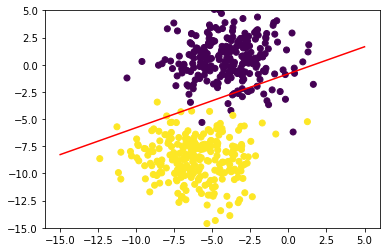

In [ ]:
plt.ylim([-15.,5.])
plt.scatter(X[:,0], X[:,1], c=y)

# w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_
xx = np.linspace(-15,5,100)
yy = -w1/w2 * xx -b/w2
plt.plot(xx, yy, c='r')

# Exercise

- exam 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDClassifier
from sklearn.datasets import make_regression, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
def show_plot(model, X, i):
    df = pd.DataFrame(X)
    coef = pd.Series(model.coef_, df.columns)
    plt.subplot(1,3,i)
    coef.plot(kind='bar', title='model coefficients')

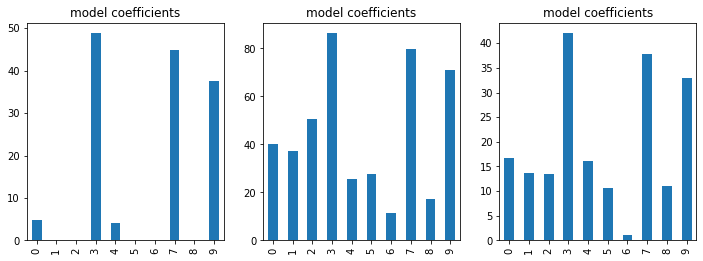

In [ ]:
X, y = make_regression(n_samples=100, n_features=10, noise=30, random_state=1)
X = StandardScaler().fit_transform(X)

clf1, clf2, clf3 = (Lasso(alpha = 30), LinearRegression(), Ridge(alpha = 100))
clfs = [clf1, clf2, clf3]
plt.figure(figsize=(12,4))
for i, clf in enumerate(clfs, 1):
    clf.fit(X, y)
    show_plot(clf, X, i)

0.96
[[ -1.19851891 -69.01441866]] [-195.85392913]


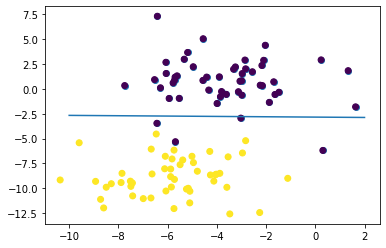

In [ ]:
(X, y) = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=2.0, random_state=17)
markers = ['o','+']
for i in range(2):
    xs = X[:, 0][y == i]
    ys = X[:, 1][y == i]
    plt.scatter(xs, ys, marker=markers[i])
plt.scatter(X[:,0], X[:,1], c=y)
clf = SGDClassifier()
clf.fit(X, y)
print(clf.score(X, y))
print(clf.coef_, clf.intercept_)
w1, w2, b = clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]
xx = np.linspace(-10,2,100)
yy = -w1/w2 * xx - b/w2
plt.plot(xx, yy)